# Homework 8

### Intro to Matplotlib
In this assignment, you will practice using Matplotlib (integrated with Pandas) to visualize and analyze your data set. Your visuals should provide a meaningful analysis of the data as it pertains to your working hypothesis.

(Reminder: a chart is a single plot or set of plots intended to convey a total idea)

Your visuals should include at least one of the following:
- Bar plot (both horizontal and vertical)
- Line plot
- Histogram
- Scatter plot (if you have only time series data, you may not be able to do this; email me if this is the case and I will waive the requirement)

Each chart should be accompanied with a meaningful interpretation of the data ("x category has the most observations" is not meaningful unless it is accompanied with a reason why having the most observations is important to your hypothesis). Graphics are meant to provide insights into the data that cannot be easily or effectively explained (i.e. "a picture is worth a thousand words"). If you are just plotting for the sake of plotting, you will not receive full credit.

Your charts should be structured using at least one of each of the following (which will contain one or some of your plots above):
- A chart with a single plot
- A chart with side-by-side plots
- A multi-plot chart with three or more plots

For each chart, you should put: 
- A meaningful title
- Descriptive subtitles
- Modify the x- and y-labels appropriately
- A legend for your line plot placed in a non-obstructive location

I've created sections in this notebook for you to create each of your three major charts.

## Data Topic

In the space below, describe the topic you are analyzing

Student GPAs with majors and class year included

In the space below, describe your working hypothesis. A hypothesis is an idea that you are trying to prove through analysis

Finance majors have the highest GPAs<br/>
Female finance majors get more 4.0s than male finance majors<br/>
Female finance majors show more improvement in their 4 years of school than females in all other majors

## Data Load

Use this section to load your data from Homework 7 so that you can either re-create your analyses or create new analysis so that you can generate the plots for this homework.

In [18]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import json
import csv
from datetime import datetime
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [227]:
student_info = pd.read_csv('students.csv')

In [228]:
student_info.head()

,student_id,first,last,gender,class,major,gpa
0,5a397209-3782-4764-a285-10fae807ee71,Janis,Brown,Female,Junior,Economics,3.12
1,e26c3d69-3c74-49b6-81d7-47232787fad9,Timothy,Bishop,Male,Sophomore,Economics,3.48
2,975c1581-5ba2-430c-a3d1-01ce03bd83f9,Elizabeth,Owens,Female,Freshman,Finance,3.40
3,6081f91d-365c-46ce-ad1b-38af120781d9,Edward,Pearson,Male,Freshman,Math,3.84
4,84cec8f4-0b64-44ce-a628-c0eb73f6ca6f,Lisa,Gonzalez,Female,Junior,Finance,4.00


In [229]:
student_info.describe()

,gpa
count,10000.000000
mean,3.376526
std,0.370042
min,1.720000
25%,3.120000
50%,3.380000
75%,3.650000
max,4.000000


## Chart 1 - Single Chart

In this section, please analyze your data to generate a single chart that represents a critical high level observation/insight about your data.

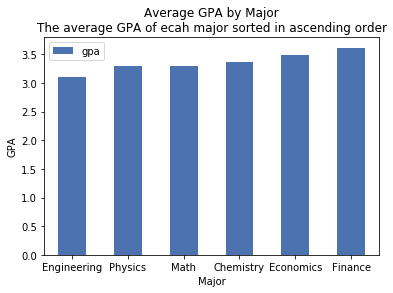

In [248]:
student_info_agg = student_info.groupby(["major"])[["gpa"]].mean().sort_values('gpa')

ax = student_info_agg.plot.bar(rot=0)
ax.set_title('Average GPA by Major\nThe average GPA of ecah major sorted in ascending order')
ax.set_ylabel('GPA')
ax.set_xlabel('Major')

plt.show()

#### Chart 1 Key Insight or Takeaway
Please describe what you analyzed and how it supports or refutes your working hypothesis. You do not necessarily have to have proven your hypothesis - just that you understand how your chart supports or disputes your hypothesis.

This shows us that Finance does have the highest average GPA

## Chart 2 - Side-by-Side Chart

In this section, , positioned side-by-side, and put them into a single chart .

In this section, please analyze your data to generate two plots, positioned side-by-side, in a single chart that can be looked at *together* to generate a comparison.

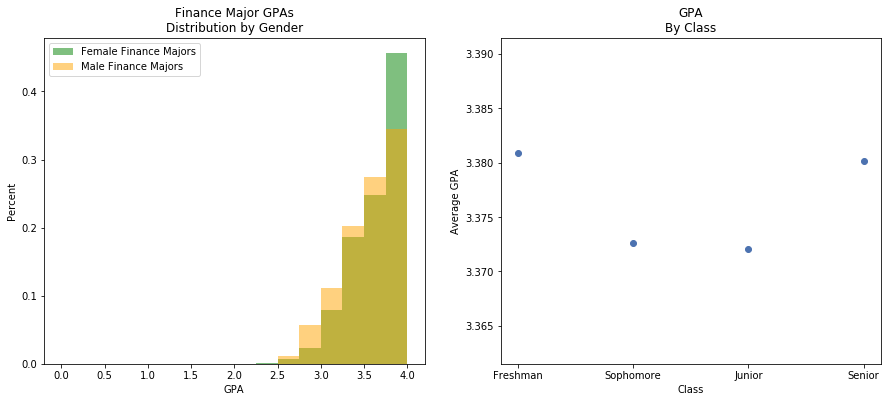

In [319]:
plt.figure(figsize=(15,6))

bins = [0,.25,.5,.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4]
plt.subplot(1, 2, 1)
plt.hist(female_finance_df["gpa"], density=False, bins=bins, weights=np.ones(len(female_finance_df["gpa"])) / len(female_finance_df["gpa"]), facecolor='green', alpha=0.5, label="Female Finance Majors")
plt.hist(male_finance_df["gpa"], density=False, bins=bins, weights=np.ones(len(male_finance_df["gpa"])) / len(male_finance_df["gpa"]), facecolor='orange', alpha=0.5, label="Male Finance Majors")
plt.legend(loc='upper left')
plt.ylabel('Percent')
plt.xlabel('GPA')
plt.title("Finance Major GPAs\nDistribution by Gender")



student_info_agg2 = student_info.groupby(["class"])[["gpa"]].mean().sort_values('gpa')

#Having to do this was super annoying but I couldn't find any way to reference the original class and got sick of wasting time 
class_list = student_info_agg2.index.tolist()
student_info_agg2["class_reference"] = class_list
class_rank_dict = {'Freshman' : 1, 'Sophomore' : 2, 'Junior' : 3, 'Senior' : 4}
student_info_agg2["class_rank"] = student_info_agg2["class_reference"].map(class_rank_dict)
student_info_agg2.sort_values(by=["class_rank"], inplace=True)
student_info_agg2

plt.subplot(1, 2, 2)
plt.scatter(student_info_agg2["class_reference"], student_info_agg2["gpa"])
plt.ylabel("Average GPA")
plt.xlabel("Class")
plt.title("GPA\nBy Class")

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=None)
plt.show()

#### Chart 2 Key Insight or Takeaway
Please describe what you analyzed and how it supports or refutes your working hypothesis. You do not necessarily have to have proven your hypothesis - just that you understand how your chart supports or disputes your hypothesis.

Compared to males, a higher proportion of females get 4.0s in Finance.<br/>
Overall it doesn't appear that grades get higher as students progress through their years of study, but perhaps if we start splitting that by gender and major that will change.

## Chart 3 - Multi-Plot Chart

In this section, please generate three or more plots, positioned , and put them into a single chart that can be looked at *together* to generate a summary visual that conveys a complex insight or comparison.

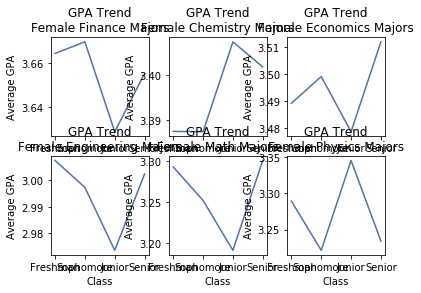

<Figure size 216x144 with 0 Axes>

In [478]:
student_info_agg3 = student_info.groupby(["gender","major","class"])[["gpa"]].mean()
#student_info_agg3

#Having to do this was super annoying but I couldn't find any way to reference the original class and got sick of wasting time but the fact that it's not automatically referenceable sucks, when you groupby in Spark you can reference the groupBy variable regularly no bullshit 
class_list3 = student_info_agg3.index.tolist()
class_list_final = []
gender_list_final = []
major_list_final = []
for i in range(len(class_list3)):
    class_list_final.append(class_list3[i][2])
    gender_list_final.append(class_list3[i][0])
    major_list_final.append(class_list3[i][1])
student_info_agg3["class_reference"] = class_list_final
student_info_agg3["gender_reference"] = gender_list_final
student_info_agg3["major_reference"] = major_list_final
student_info_agg3

class_rank_dict = {'Freshman' : 1, 'Sophomore' : 2, 'Junior' : 3, 'Senior' : 4}
student_info_agg3["class_rank"] = student_info_agg3["class_reference"].map(class_rank_dict)
student_info_agg3.sort_values(by=["gender","class_rank"], inplace=True)
females = student_info_agg3[student_info_agg3["gender_reference"]=="Female"]
males = student_info_agg3[student_info_agg3["gender_reference"]=="Male"]

female_filt = student_info_agg3["gender_reference"] == "Female"
fin_filt = student_info_agg3["major_reference"] == "Finance"
chem_filt = student_info_agg3["major_reference"] == "Chemistry"
econ_filt = student_info_agg3["major_reference"] == "Economics"
eng_filt = student_info_agg3["major_reference"] == "Engineering"
mth_filt = student_info_agg3["major_reference"] == "Math"
phys_filt = student_info_agg3["major_reference"] == "Physics"

student_info_agg3_female_finance = student_info_agg3[female_filt & fin_filt]
student_info_agg3_female_chem = student_info_agg3[female_filt & chem_filt]
student_info_agg3_female_econ = student_info_agg3[female_filt & econ_filt]
student_info_agg3_female_eng = student_info_agg3[female_filt & eng_filt]
student_info_agg3_female_math = student_info_agg3[female_filt & mth_filt]
student_info_agg3_female_phys = student_info_agg3[female_filt & phys_filt]

plt.subplot(2,3,1)
plt.plot(student_info_agg3_female_finance["class_reference"],student_info_agg3_female_finance["gpa"])
plt.ylabel("Average GPA")
plt.xlabel("Class")
plt.title("GPA Trend\nFemale Finance Majors")

plt.subplot(2,3,2)
plt.plot(student_info_agg3_female_chem["class_reference"],student_info_agg3_female_chem["gpa"])
plt.ylabel("Average GPA")
plt.xlabel("Class")
plt.title("GPA Trend\nFemale Chemistry Majors")

plt.subplot(2,3,3)
plt.plot(student_info_agg3_female_econ["class_reference"],student_info_agg3_female_econ["gpa"])
plt.ylabel("Average GPA")
plt.xlabel("Class")
plt.title("GPA Trend\nFemale Economics Majors")

plt.subplot(2,3,4)
plt.plot(student_info_agg3_female_eng["class_reference"],student_info_agg3_female_eng["gpa"])
plt.ylabel("Average GPA")
plt.xlabel("Class")
plt.title("GPA Trend\nFemale Engineering Majors")

plt.subplot(2,3,5)
plt.plot(student_info_agg3_female_math["class_reference"],student_info_agg3_female_math["gpa"])
plt.ylabel("Average GPA")
plt.xlabel("Class")
plt.title("GPA Trend\nFemale Math Majors")

plt.subplot(2,3,6)
plt.plot(student_info_agg3_female_phys["class_reference"],student_info_agg3_female_phys["gpa"])
plt.ylabel("Average GPA")
plt.xlabel("Class")
plt.title("GPA Trend\nFemale Physics Majors")

#fig = plt.figure(figsize=(2,4))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None)#, wspace=2, hspace=2)
fig = plt.figure(figsize=(3,2))
plt.tight_layout(pad=0.4, w_pad=6, h_pad=3)

plt.show()

#### Chart 3 Key Insight or Takeaway
Please describe what you analyzed and how it supports or refutes your working hypothesis. You do not necessarily have to have proven your hypothesis - just that you understand how your chart supports or disputes your hypothesis.

Female finance majors do not show the most improvement of all female majors - Chemistry does